In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
199,199,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.5kg,55677.600
144,144,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86kg,19660.320
629,629,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2kg,96969.600
527,527,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8GB,2TB HDD,Nvidia GeForce 920MX,No OS,2.2kg,24455.520
280,280,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.8kg,45767.520
254,254,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,256GB SSD,Nvidia GeForce MX130,Windows 10,3kg,37402.560
900,900,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7Y75 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,107257.968
1028,1028,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,86526.720
139,139,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,37242.720
190,190,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns=['Unnamed: 0'],inplace= True)

In [8]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df['Ram'] = df['Ram'].str.replace("GB", '')


In [10]:
df['Ram'] = df.Ram.astype(int)

In [11]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [12]:
df['Price'] = df['Price'].astype(int)

In [13]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1150,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.90,18061
129,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.50,49443
244,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489
1222,HP,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 2.7GHz,6,1TB HDD,AMD Radeon 530,Windows 10,2.10,28185
860,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,45323


Performing EDA : 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Density'>

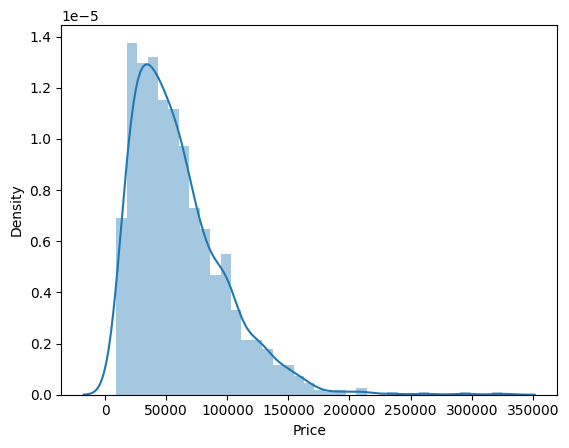

In [15]:
sns.distplot(df['Price'])

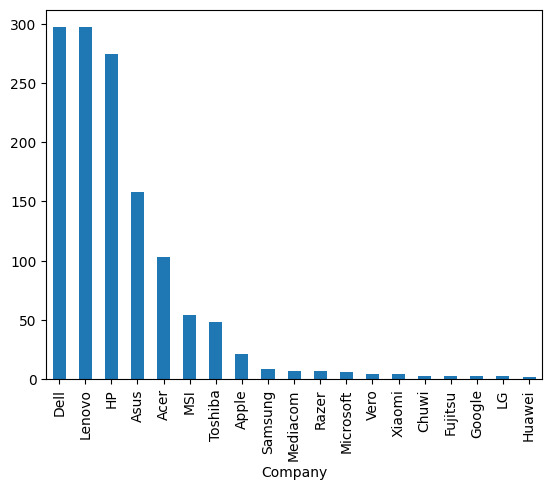

In [16]:
df['Company'].value_counts().plot.bar()
plt.show()

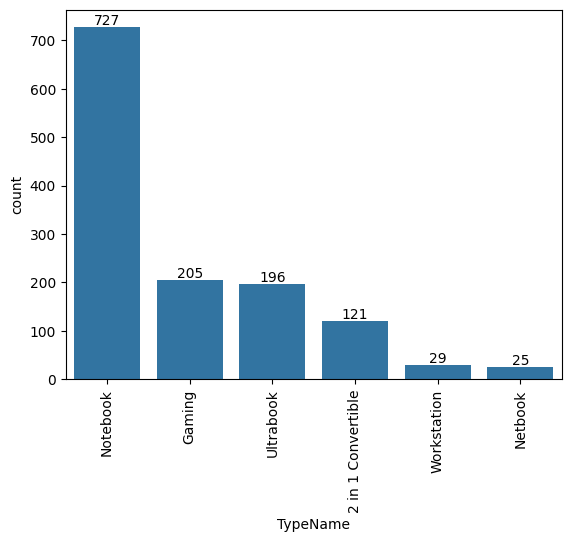

In [17]:
ax = sns.barplot(df['TypeName'].value_counts())
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )
plt.show()

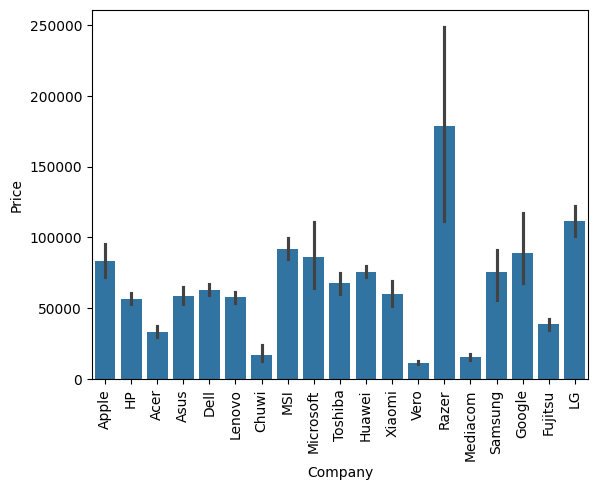

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

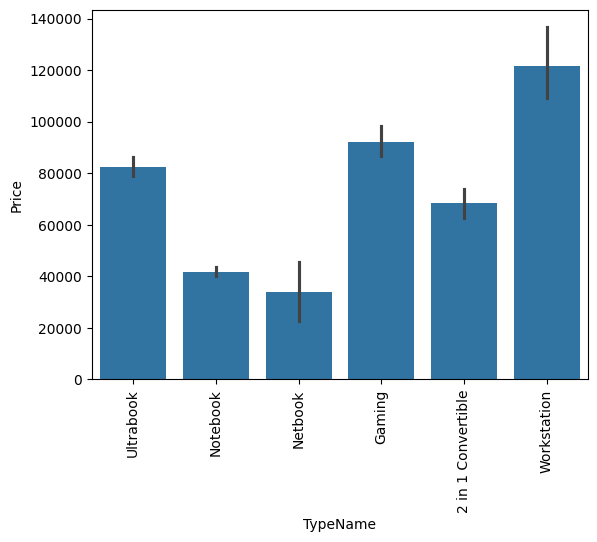

In [19]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

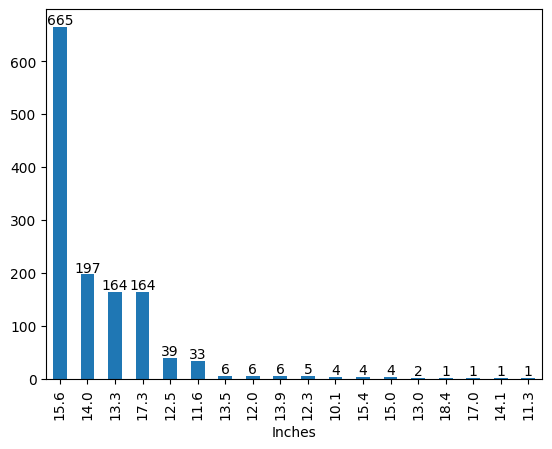

In [20]:
ax = df['Inches'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )

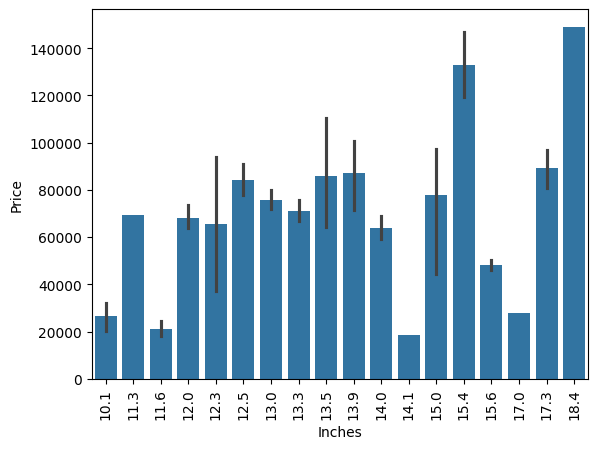

In [21]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [22]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [23]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
10,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.86,20986,0
554,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,68198,0
1167,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,24935,0
894,MSI,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,141138,0
1287,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705,0


Text(0.5, 1.0, 'Average Price')

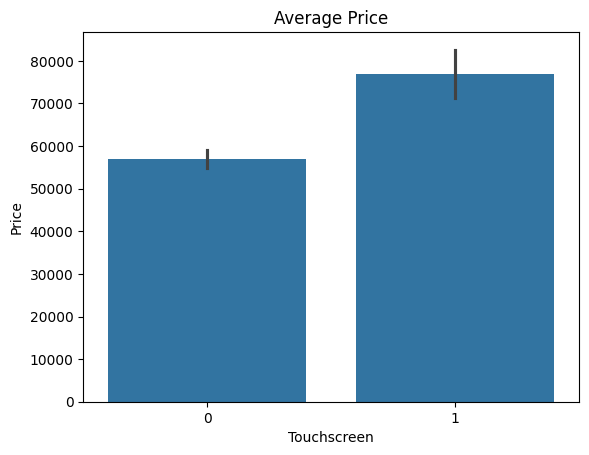

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.title('Average Price')

In [26]:
df['Panel'] = df['ScreenResolution'].apply(lambda x:'IPS Panel' if 'IPS Panel' in x else 'Other')

In [27]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Panel
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017,0,IPS Panel
1039,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,53839,0,Other
417,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,79920,0,Other
441,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,AMD Radeon 530,Windows 10,2.20,39906,0,Other
329,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,140605,1,Other
1019,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,118761,0,Other
1195,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702,0,IPS Panel


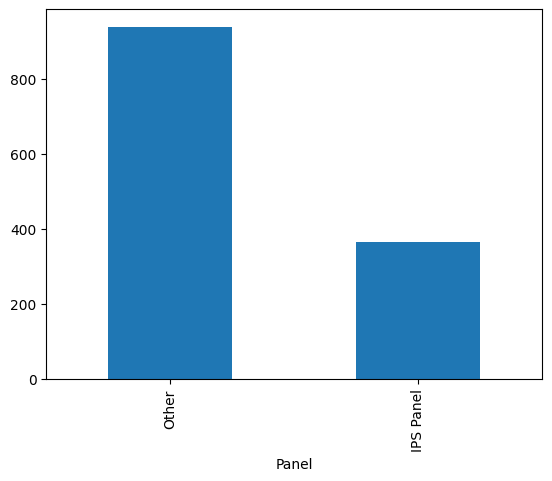

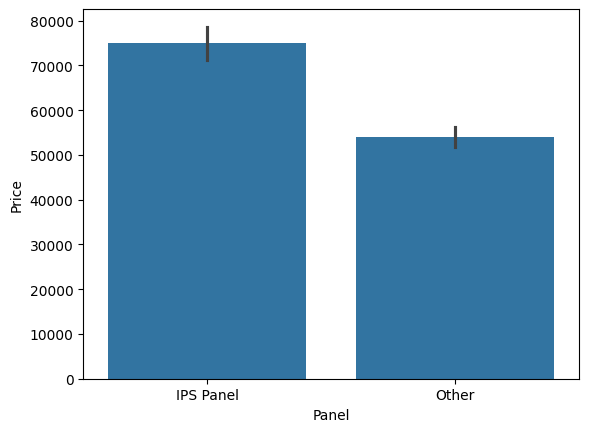

In [28]:
df['Panel'].value_counts().plot(kind='bar')
plt.show()
sns.barplot(x=df['Panel'],y=df['Price'])
plt.show()

In [29]:
df['Resolution']=df['ScreenResolution'].str.split().str[-1]
df['x_Resolution']=df['Resolution'].str.split('x').str[0].astype(int)
df['y_Resolution']=df['Resolution'].str.split('x').str[1].astype(int)

In [30]:
df['PPI']=((((df['x_Resolution']**2 + df['y_Resolution']**2)**0.5)/df['Inches']).round(2)).astype(float)

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Panel,Resolution,x_Resolution,y_Resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,IPS Panel,2560x1600,2560,1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,Other,1440x900,1440,900,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,Other,1920x1080,1920,1080,141.21
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,IPS Panel,2880x1800,2880,1800,220.53
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,IPS Panel,2560x1600,2560,1600,226.98


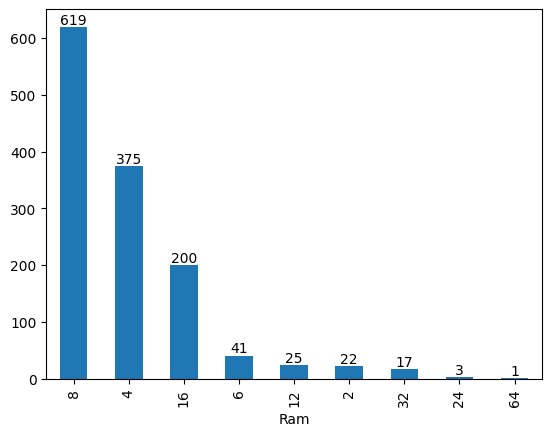

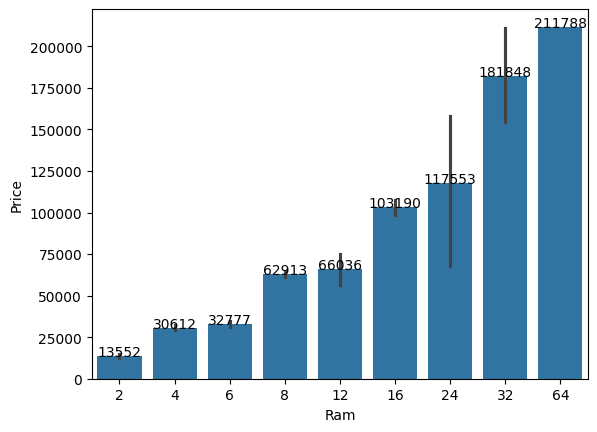

In [32]:
ax = df['Ram'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )
plt.show()
ax = sns.barplot(x=df['Ram'],y=df['Price'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )
plt.show()

In [33]:
df.corr(numeric_only=True)['Price']


Inches          0.068196
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
x_Resolution    0.556529
y_Resolution    0.552809
PPI             0.473505
Name: Price, dtype: float64

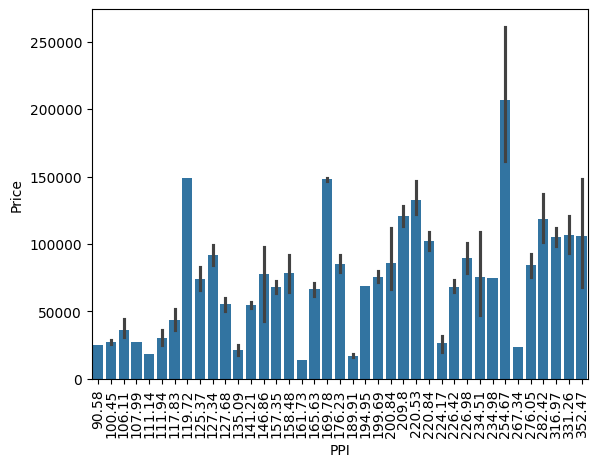

In [34]:
sns.barplot(x=df['PPI'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  Panel             1303 non-null   object 
 13  Resolution        1303 non-null   object 
 14  x_Resolution      1303 non-null   int64  
 15  y_Resolution      1303 non-null   int64  
 16  PPI               1303 non-null   float64


In [36]:
df.drop(columns = ['ScreenResolution','x_Resolution','y_Resolution'],inplace=True)

In [37]:
df['Processor'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [38]:
def fetch_processor(text):
    if text in ["Intel Core i7" ,"Intel Core i5", "Intel Core i3"]:
        return text
    elif text.split()[0] == "Intel" :
        return 'Intel'
    else :
        return 'AMD'

In [39]:
df['Processor'] = df['Processor'].apply(fetch_processor)

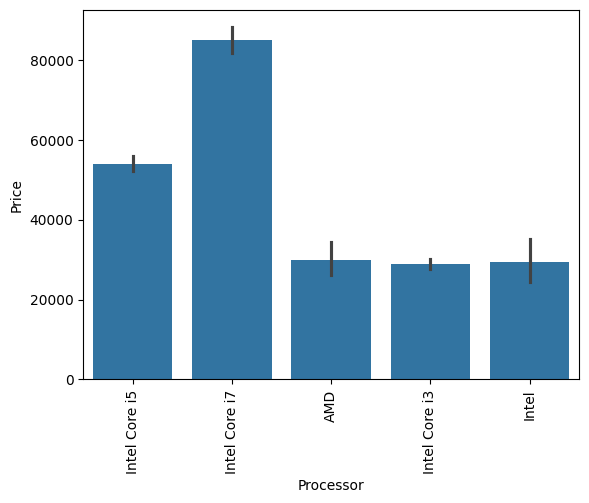

In [40]:
sns.barplot(x=df['Processor'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [41]:
df.drop(columns=['Cpu'],inplace= True)

In [42]:
df['Gpu_Brand'] = df['Gpu'].str.split(n=1).str[0]

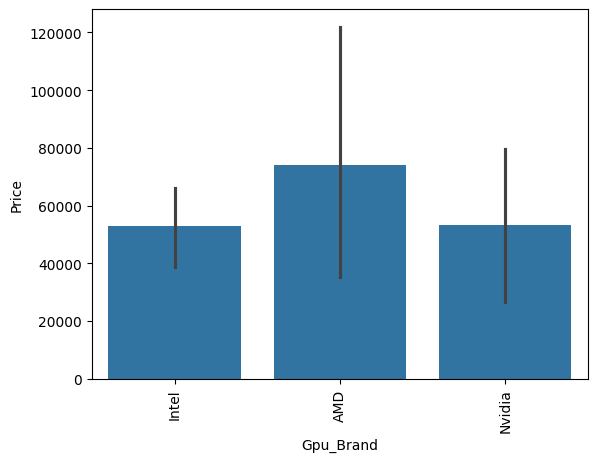

In [43]:
sns.barplot(x=df['Gpu_Brand'].head(25),y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

In [44]:
import re
import pandas as pd

def parse_memory(text):
    text = str(text).upper()
    
    
    pattern = r'(\d+)\s*(GB|TB)\s*(SSD|HDD|FLASH STORAGE|HYBRID|EMMC)?'
    matches = re.findall(pattern, text)

    hdd = 0
    ssd = 0
    types = set()

    for size, unit, mem_type in matches:
        size = int(size)
        if unit == 'TB':
            size *= 1024
        
        if mem_type:
            mem_type_clean = mem_type.strip().upper()
            types.add(mem_type_clean)

            if mem_type_clean == 'HDD':
                hdd += size
            elif mem_type_clean == 'SSD':
                ssd += size

    
    return pd.Series([hdd, ssd, ' + '.join(sorted(types))])

df[['HDD', 'SSD', 'Memory_Types']] = df['Memory'].apply(parse_memory)

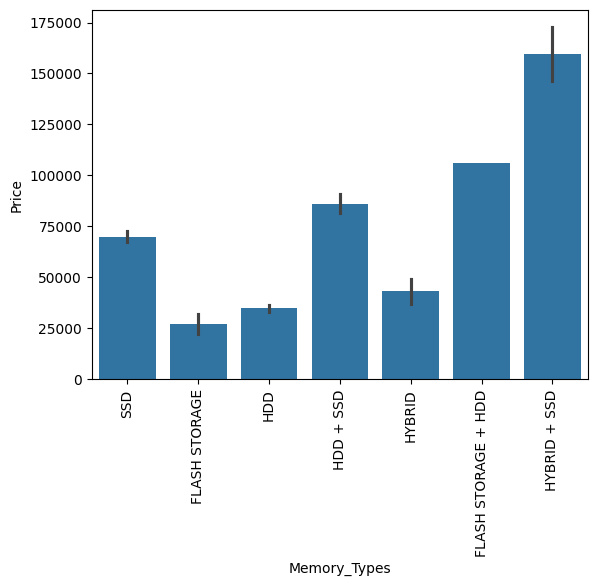

In [45]:
sns.barplot(x=df['Memory_Types'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
df.drop(columns=['Memory','Gpu','Resolution'],inplace=True)

In [47]:
df.sample(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Panel,PPI,Processor,Gpu_Brand,HDD,SSD,Memory_Types
559,Dell,Notebook,15.6,4,Windows 10,2.18,32921,0,Other,100.45,Intel Core i3,AMD,1024,0,HDD
1160,Lenovo,Ultrabook,14.0,8,Windows 7,1.70,79866,0,Other,157.35,Intel Core i7,Intel,0,256,SSD
239,Acer,Gaming,15.6,8,Windows 10,2.50,45074,0,IPS Panel,141.21,Intel Core i5,Nvidia,0,256,SSD


In [48]:
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'Lenovo'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'HP'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'Asus'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'Xiaomi'), 'OpSys'] = 'Chrome OS'
df.loc[(df['OpSys'] == 'Windows 10'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'Windows 10 S'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'Windows 7'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'Mac OS X'), 'OpSys'] = 'macOS'

In [49]:
df['OpSys'].value_counts()

OpSys
Windows      1188
Linux          62
Chrome OS      30
macOS          21
Android         2
Name: count, dtype: int64

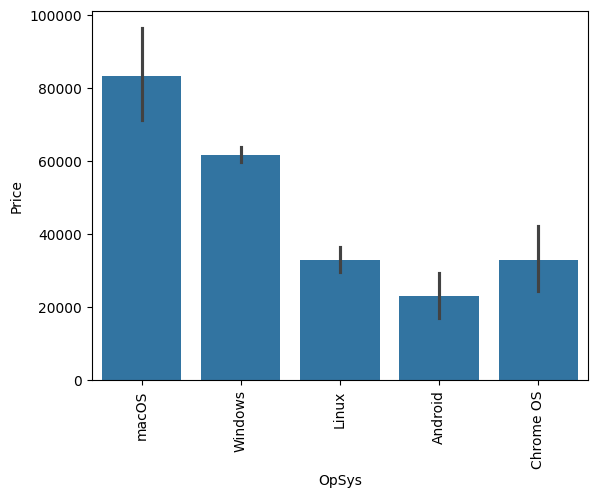

In [50]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: >

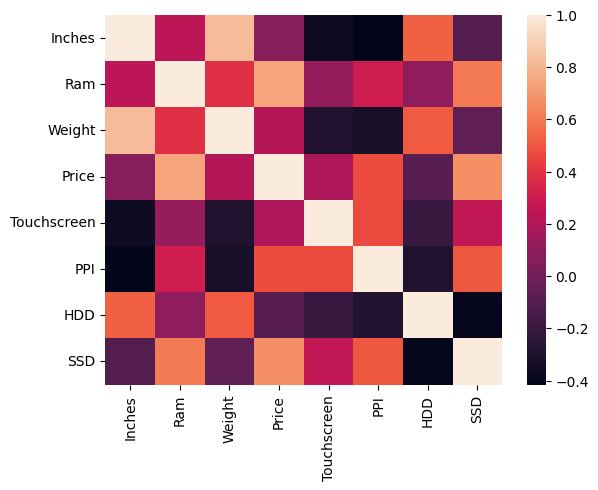

In [51]:
sns.heatmap(df.corr(numeric_only=True))

In [52]:
x = df.drop(columns='Price')
y = np.log(df['Price'])

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=15) 

In [54]:
x_train.shape

(1042, 14)

In [55]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Panel', 'PPI', 'Processor', 'Gpu_Brand', 'HDD', 'SSD',
       'Memory_Types'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error

In [57]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [58]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),
     ['Company', 'TypeName', 'OpSys', 'Panel', 'Processor', 'Gpu_Brand', 'Memory_Types'])
], remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

VotingRegressor =VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

StackingRegressor = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))


models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso':Lasso(alpha=0.001),
    'KNN':KNeighborsRegressor(n_neighbors=3),
    'DecisionTree': DecisionTreeRegressor(max_depth=8),
    'SVM':SVR(kernel='rbf',C=10000,epsilon=0.1),
    'ExtraTrees': ExtraTreesRegressor(random_state=3),
    'RandomForest': RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15),
    'AdaBoost': AdaBoostRegressor(n_estimators=15,learning_rate=1.0),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500),
    'XGBoost': XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5),
    'StackingRegressor':StackingRegressor,
    'VotingRegressor':VotingRegressor
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('step1', step1),
        ('step2', model)
    ])
    
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    
    print(f" Model:     {name}")
    print(f" R2 Score:  {r2:.4f}")
    print(f" MAE:       {mae:.2f}")
    print("="*40)
    
    
    results.append({'Model': name, 'R2': r2, 'MAE': mae})

 Model:     LinearRegression
 R2 Score:  0.8160
 MAE:       0.20
 Model:     Ridge
 R2 Score:  0.8156
 MAE:       0.20
 Model:     Lasso
 R2 Score:  0.8150
 MAE:       0.20
 Model:     KNN
 R2 Score:  0.7940
 MAE:       0.21
 Model:     DecisionTree
 R2 Score:  0.7972
 MAE:       0.20
 Model:     SVM
 R2 Score:  0.8103
 MAE:       0.19
 Model:     ExtraTrees
 R2 Score:  0.8488
 MAE:       0.16
 Model:     RandomForest
 R2 Score:  0.8672
 MAE:       0.16
 Model:     AdaBoost
 R2 Score:  0.7845
 MAE:       0.22
 Model:     GradientBoosting
 R2 Score:  0.8835
 MAE:       0.15
 Model:     XGBoost
 R2 Score:  0.8525
 MAE:       0.17
 Model:     StackingRegressor
 R2 Score:  0.8700
 MAE:       0.16
 Model:     VotingRegressor
 R2 Score:  0.8766
 MAE:       0.16


In [59]:
results_df = pd.DataFrame(results)
display(results_df)

,Model,R2,MAE
0,LinearRegression,0.815986,0.201752
1,Ridge,0.815643,0.203198
2,Lasso,0.814976,0.203290
3,KNN,0.794036,0.207836
4,DecisionTree,0.797220,0.198178
5,SVM,0.810271,0.190220
6,ExtraTrees,0.848819,0.162969
7,RandomForest,0.867232,0.159899
8,AdaBoost,0.784504,0.222043
9,GradientBoosting,0.883541,0.151920


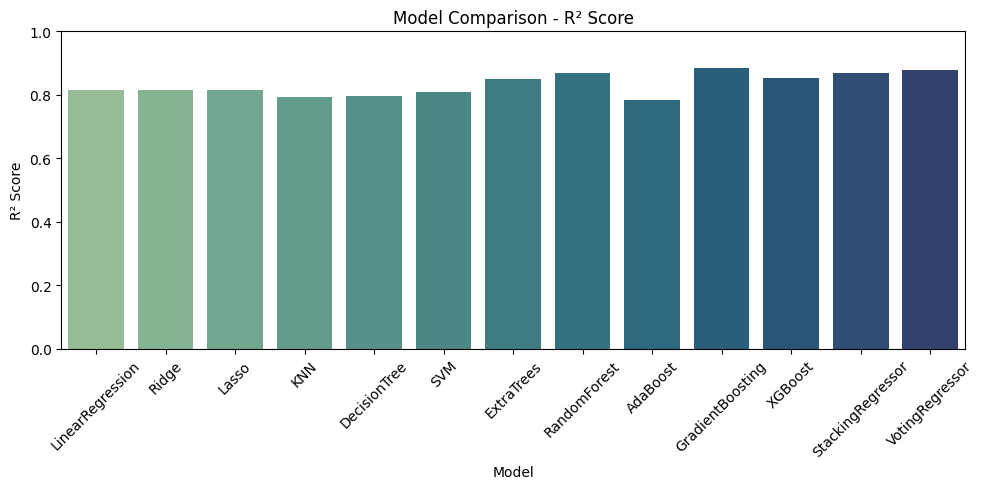

In [60]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2', hue='Model', data=results_df, palette="crest", legend=False)

plt.title("Model Comparison - R² Score")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
print(f"Best Model Selected: {best_model_name}")


Best Model Selected: GradientBoosting


In [62]:
import joblib

final_model = models[best_model_name]

final_pipe = Pipeline([
    ('step1', step1),
    ('step2', final_model)
])

final_pipe.fit(x_train, y_train)

joblib.dump(final_pipe, 'pipe.pkl')
joblib.dump(df, 'df.pkl')


['df.pkl']